In [1]:
from math import cos, sin, pi
from numpy import array, linspace
import pylab as plt
from shootyourshot import shootyourshot
from point3 import point3



# <center> Steph Curry with the Shot: Basketball 3-Point Shot Trajectories <center>

For the 2019/2020 season, the NCAA made the decision to move the divison 1 mens 3-point line back to 22 ft and 1.75 in, which is the international 3-point line. It was previously at 20 ft and 9 in which is what the womens line remains at. The NCAA released a statement on their reasoning behind the change: "Slowing the trend of the 3-point shot becoming too prevalent in men’s college basketball by making the shot a bit more challenging, while at the same time keeping the shot an integral part of the game."

Famous basketball players like Steph Curry are proof that 3-point shots are becoming more prevalent in basketball at every level. Have you ever wondered what different initial conditions you can throw a basketball and make a 3-point shot? Utilizing the equations for motion and the runge-kutta method for solving ordinary differential equations, all the trajectories for a sucessful 3-point shot can be graphed from both the womens and mens 3-point lines.

Both pictures below showcase the John M.Belk arena, home court for the Division 1 Davidson College Mens and Womens Basketball teams. The picture on the left was taken during the 2019/2020 season and has two seperate 3-point lines, one for men and one for women. The picture on the right was taken during the 2018/2019 and as you can see there was only one 3-point line used for both the mens and womens teams.

<table><tr>
<td> <img src="https://stadiumjourney.com/wp-content/uploads/2016/01/Overview-of-Belk-Arena.jpg" alt="Drawing" style="width: 475px;"/> </td>
<td> <img src="https://davidsonwildcats.com/images/2016/4/28//BKC2_21_15_227.jpg" alt="Drawing" style="width: 400px;"/> </td>
</tr></table>

## <center> What physics is involved in a 3-point shot? <center>
First, we will decide that the basketball is only moving in the X and Z direction, therefore, the shot must be coming from directly in front of the hoop. The X direction is parallel to the ground and the Z direction is normal to the ground, pointing in the direction of the basket. We will only consider shots that pass cleanly through the hoop. Since the diameter of a basketball is 0.79ft and the diameter of the hoop is 1.5ft, the basketball must pass within 0.35ft of the center of the hoop to score. 

To graph the trajectory of the basketball we need to know the location, velocity, and acceleration in both the X and Z directions. To find the acceleration we can refer to **Newtons second law of motion** that states,
$$F = ma\$$
In this equation, F is the sum of all the forces, m is the mass, and a is the acceleration. Therefore the acceleration is F/m. We can use the acceleration to find the velocity and location of the ball at any moment. 

The acceleration of the basketball in the Z direction has a component, -g, that is due to the force of gravity and is equal to the gravitational constant. In order for the acceleration of the ball to be realistic, we will also take into consideration the **drag** of the basketball. When an object is moving through the air, the air resists its motion. This air resistance is called drag and is present on all moving objects, including a basketball.   The drag on the ball causes an acceleration in both the X and Z directions that depends on the velocity of the ball and a constant referred to as Kd. The equation for Kd is also found in the equations below and it takes into account the drag coefficient (Cd), the atmospheric density (p), the cross-sectional area of the basketball (A) and the mass of the basketball (m). The drag coefficient for a basketball is approximately 0.5 and is usually determined experimentally.

**Equations for motion of a basketball:**

$$\begin{eqnarray}
V &=& (Vx^2 + Vz^2)^\frac{1}{2}\\
\frac{dx}{dt} &=& Vx \\
\frac{dz}{dt} &=& Vz \\
\frac{dVx}{dt} &=& -Kd*V*Vx \\
\frac{dVz}{dt} &=& -Kd*V*Vz-g \\
Kd &=& \frac{Cd*p*A}{2*m}
\end{eqnarray}$$

**The image below shows a realistic diagram of the initial velocity and angle that a basketball is thrown:**
<img src="https://i.pinimg.com/600x315/c7/df/2e/c7df2e26e8b5b86deaf5e6ea15c2a560.jpg" alt="Drawing" style="width: 475px;"/>

## <center> How do we solve these nonlinear functions? <center>
We will utilize the **fourth order Runge-Kutta** method in order to solve these equations. The Runge-Kutta method is an ordinary differential equations solver that allows us to use nonlinear functions that cannot be solved analytically, and solve them numerically.  This method generates an approximate solution by using the Taylor series expansion. Since we will be using the fourth order method, we will consider 4 approximations of the slope and then use a weighted sum to get our final estimate. The fourth order Runge-Kutta method is commonly instead of the second or first order because it is a great balance between simplicity in coding and high accuracy results. The equations for this method are below.

**Equations for 4th order Runge-Kutta:**

$$\begin{eqnarray}
k1 &=& hf(r) \\
k2 &=& hf(r+\frac{1}{2}k1) \\
k3 &=& hf((r+\frac{1}{2}k2) \\
k4 &=& hf(r+k3) \\
r &=& r +\frac{1}{6}(k1+2k2+2k3+k4)
\end{eqnarray}$$


### Below is the function for the motion of the basketball that will be used for the runge-kutta method:

Since all the equations for the motion of the basketball shot are already in the form of first order equations, there is not much you need to alter from the equations given above.

In [4]:
def f(r):
    vx=r[2] #defining x-velocity from r
    vz=r[3] #defining z-velocity from r
    v=(vx**2+vz**2)**0.5 #need v for both ax and az
    ax= -kd*v*vx #acceleration in x direction
    az= -kd*v*vx-g #acceleration in zdirection
    
    return array([vx,vz,ax,az],float) #return array with vx, vz, ax, and az

## Trajectory of a Single 3-Point Shot:

The first thing we decided to do was plot the trajectory of a single 3-point shot. Below is a single trajectory of a basketball using the Runge-Kutta method. The initial conditions for the basketball are that it was thrown from a height of 1.957m, which is equal to the average height of a division one mens basketball player, has an initial velocity of 9.8 m/s and has an initial angle of 45 degrees or pi/4 radians. The dot on the graph represents the hoop. The hoop is 6.75m away in the x direction, which is the distance from the new mens 3-point line to the basket, and 3.048m high, which is the height of a regulation basket.

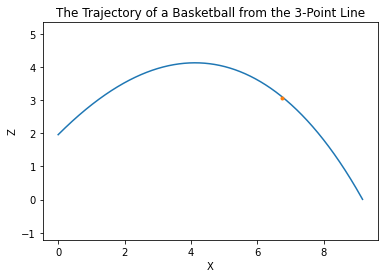

In [5]:
def main():
#    mens3 = 6.75 #3-point distances for mens in m
#    womens3 = 6.3246 #3-point distances for womens in m
#    height = 3.048 #height of basketball hoop in m
    x=0.0 #starting x, set location to 0
    z=1.956816 #height of average mens basketball player, starting z position
    
#calculating starting velocity
    v= 9.8 #starting velocity, m/s
    theta= pi/4 #starting angle
    vx= v*cos(theta)   
    vz= v*sin(theta)
        
    h=0.001 #step size, set becasue we dont have an a,b,N
    
    xpoints=[] #create empty array
    zpoints=[] #create empty array
    
    r=array([x,z,vx,vz],float)#starting array with initial location and velocity
    
    while r[1] >= 0:
        xpoints.append(r[0])
        zpoints.append(r[1])
        k1=h*f(r)
        k2=h*f(r+0.5*k1)
        k3=h*f(r+0.5*k2)
        k4=h*f(r+k3)
        r += (k1+2*k2+2*k3+k4)/6
    plt.plot(xpoints,zpoints)
    plt.plot(6.75,3.048,".")
    plt.axis('equal')
    plt.xlabel("X")
    plt.ylabel("Z")
    plt.title("The Trajectory of a Basketball from the 3-Point Line")
    plt.show()    
if __name__=="__main__":
    main()

## What angles and velocities can the basketball be thrown from and still be a successful 3-pointer?
In order to find what initial velocites and initial angles a basketball can be thrown from and still sucessful be a 3-pointer, the code must be editied to account for a range of veocities, a range of initial angles, or both.

In [8]:
#constants needed in future code
menh=1.957 #height of average mens player in m
womenh= 1.728 #height of average womens player in m

mens3 = 6.75 #3-point distances for mens in m
m3max=6.85668 #takes into account the width of a hoop, radius=0.10668m
m3min=6.64332 #takes into account the width of a hoop, radius=0.10668m

womens3 = 6.3246 #3-point distances for womens in m
w3max=6.43128 #takes into account the width of a hoop, radius=0.10668m
w3min=6.21792 #takes into account the width of a hoop, radius=0.10668m

height = 3.048 #height of basketball hoop in m

**The code below runs through initial velocites from 9.5 though 12 m/s with a constant initial angle of pi/4 radians:**

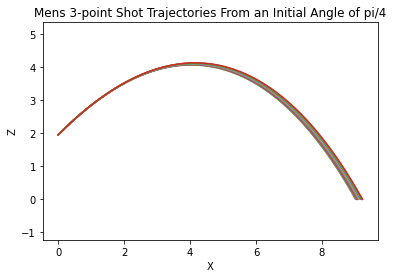

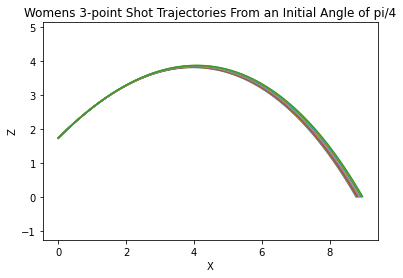

In [9]:
def main():
    for v in linspace(9.5,12,200):
        point3(v,menh,m3max,m3min,pi/4)
    plt.title("Mens 3-point Shot Trajectories From an Initial Angle of pi/4")
    plt.show()
    for v in linspace(9.5,12,200):
        point3(v,womenh,w3max,w3min,pi/4)
    plt.title("Womens 3-point Shot Trajectories From an Initial Angle of pi/4")
if __name__=="__main__":
    main()  

**The code below runs through initial angles of pi/8 though pi/2 with an initial velocity of 9.8 m/s from the mens 3-point line and then the womens 3-point line:**

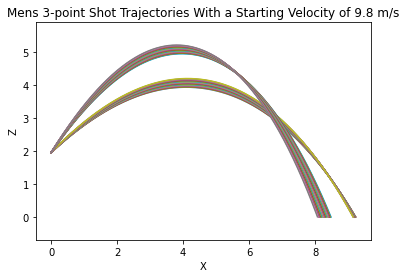

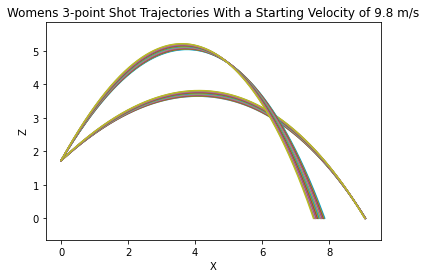

In [10]:
def main():
    for theta in linspace(0.18*pi, 0.5*pi,500):
        point3(9.8,menh,m3max,m3min,theta)
    plt.title("Mens 3-point Shot Trajectories With a Starting Velocity of 9.8 m/s")
    plt.show()
    for theta in linspace(0.18*pi, 0.5*pi,500):
        point3(9.8,womenh,w3max,w3min,theta)
    plt.title("Womens 3-point Shot Trajectories With a Starting Velocity of 9.8 m/s")
    plt.show()
if __name__=="__main__":
    main()

# What to shoot your own 3-Pointer?
### Run the code below and input any initial velocity and initial angle (in degrees) that you want. If your shot goes in, you will see a graph. It might be tricky! See if you can find a path that works!

Velocity:9.8
Starting angle in degrees:45


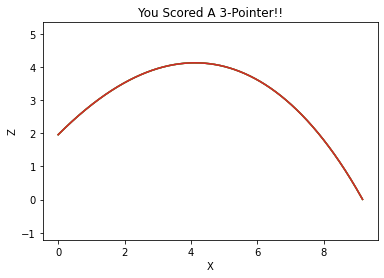

In [11]:
def main():
    shootyourshot()
if __name__=="__main__":
    main()

# Bonus Code!!!
### Warning: This code takes a long time to run, but the results are great! Therefore I attached images of the outcomes.

### This code runs through every possible trajectory of a basketball from either the mens or womens 3-point line with a range of velocities between 9.5 and 11 m/s and a range of initial angles between pi/8 and pi/2 radians.


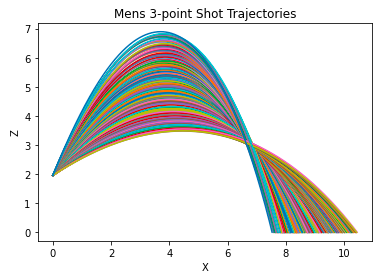
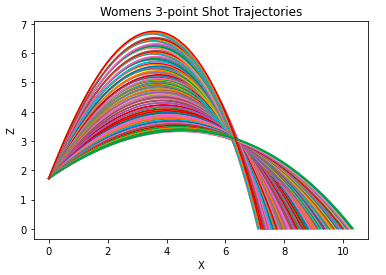


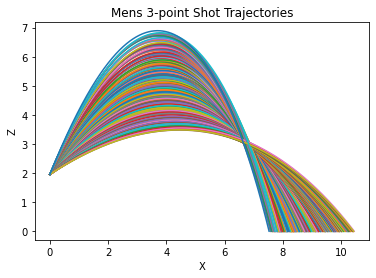

In [12]:
def main():
    for v in linspace(9.5,11,50):
        for theta in linspace(0.18*pi, 0.4*pi,50):
            point3(v,menh,m3max,m3min,theta)
    plt.title("Mens 3-point Shot Trajectories")
    plt.show()
    for v in linspace(9.5,11,40):
        for theta in linspace(0.18*pi, 0.4*pi,40):
            point3(v,womenh,w3max,w3min,theta)
    plt.title("Womens 3-point Shot Trajectories")
    plt.show()
if __name__=="__main__":
    main()